# Bike Sharing Assignment Case Study - Linear Regression

#### Importing the Library

In [245]:
# importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the library for models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [246]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [247]:
# Reading the DataSet
bike_sharing_data = pd.read_csv("day.csv")

## Step 1 :  Data Understanding

In [248]:
# Reading the head of the dataset and analyzing the attributes
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [249]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [250]:
# checking if the dataset has null values or not
bike_sharing_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### From the above analysis we can conclude that there are no null values in the dataset.

In [251]:
# analyzing the statistical values of numerical variables
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [252]:
bike_sharing_data['instant'].value_counts()

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64

In [253]:
# Dropping Instant column as it is an Index type column which is not useful in model building(nothing to do with the target)
bike_sharing_data.drop(['instant'], axis=1 , inplace=True)

In [254]:
bike_sharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [255]:
# Dropping dteday column  as it provides similar information like yr, mnth, weekday etc
bike_sharing_data.drop(['dteday'], axis=1 , inplace=True)

In [256]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- cnt is the target variable and addition of casual and registered is equal to cnt variable. So keeping casual and registerated variable makes model complicated so straightly we can drop it

In [257]:
# Dropping the casual and registered columns as as we have cnt column which is the sum of both, that is the target column
bike_sharing_data.drop(['casual','registered'], axis=1 , inplace=True)

In [258]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### By analyzing the data, we can say season,mnth,holiday,weekday,weathersit  are categorical variables, so better replace with more meaningful name

In [259]:
bike_sharing_data['season'] = bike_sharing_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing_data['mnth'] = bike_sharing_data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_sharing_data['weekday'] = bike_sharing_data['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].map({1:"Clear",2:"Mist",3:"Light",4:'Heavy'})

In [260]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [261]:
# checking the datatype of the variables again after mapping values
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2 : Data Visualisation - Applying EDA on dataset

In [262]:
# segregating the columns
categorical_column = ['season','yr','mnth','holiday', 'weekday','workingday','weathersit']
numerical_column = ['temp', 'atemp' , 'hum' , 'windspeed']

#### For the categorical columns, we can create Box plot w.r.t CNT variable

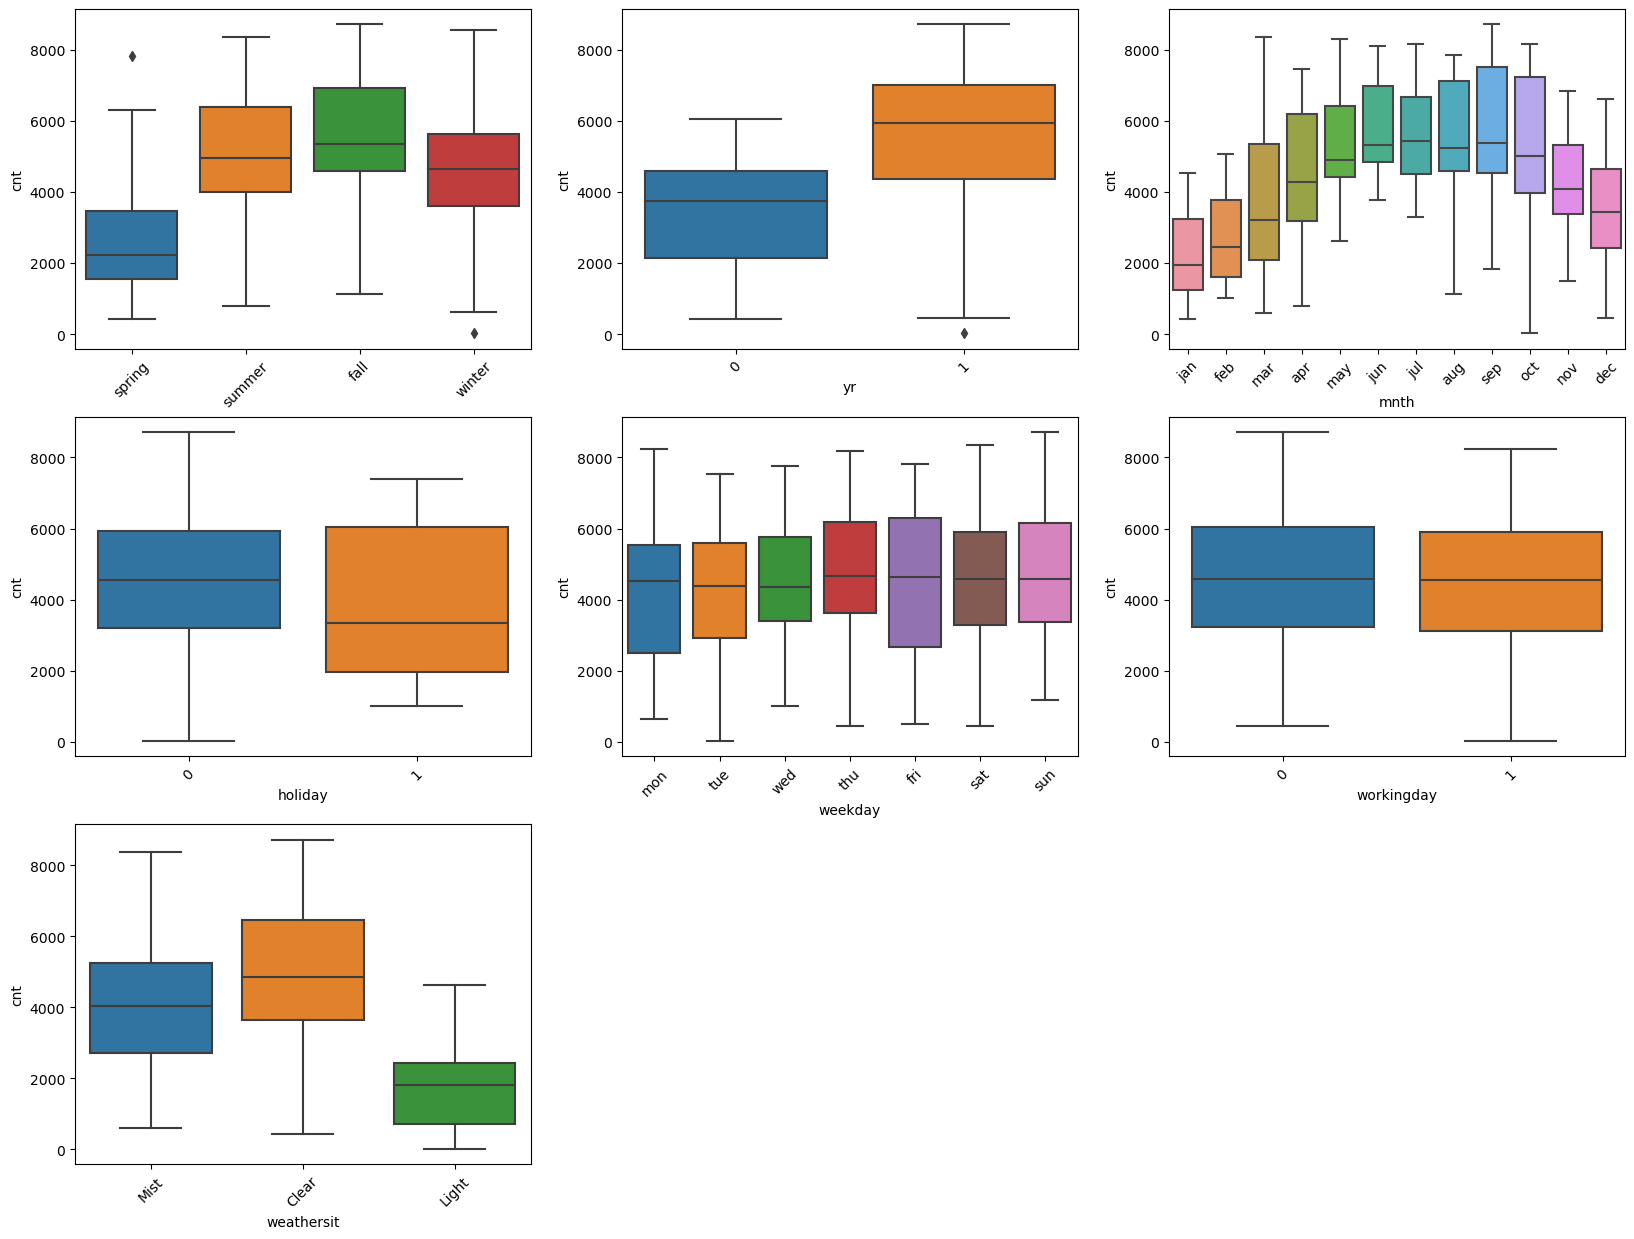

In [263]:
# Looping the categorical_column to create the box plot and using For loop to make the code more efficient and simplified

plt.figure(figsize=(20, 15))
for i,j in enumerate(categorical_column):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = j, y = 'cnt', data = bike_sharing_data)
    plt.xticks(rotation=45)
plt.show()

- Fall and summer seasons have the highest demand for rental bikes.
- Target variable is more in months from June to October.
- Cnt is more in 2019 as compared to 2018.
- People prefer to rent bikes when the sky is clear or mist/few clouds.
- During September, bike sharing is more. During the year end and the beginning, it is comparatively lesser.

#### For the categorical columns, we can create Bar plot w.r.t CNT variable Yearwise

In [264]:
def categorical_bar_yearwise(column):
    plt.figure(figsize = (14,6))
    sns.barplot(x=column,y='cnt',data=bike_sharing_data, hue='yr')
    plt.legend(title='yr', loc='upper left', labels=['2018', '2019'] ,fontsize="x-large" ,labelcolor = ['blue','orange'])
    plt.show()

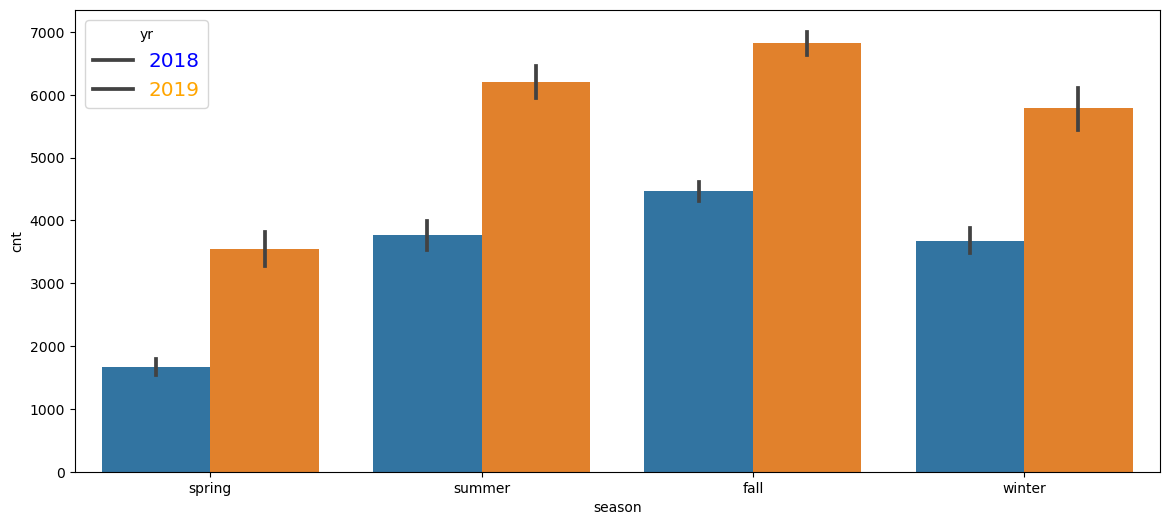

In [265]:
categorical_bar_yearwise('season')

- Fall season has the highest demand for rental bikes and the users increased from 2018 to 2019 for all seasons.

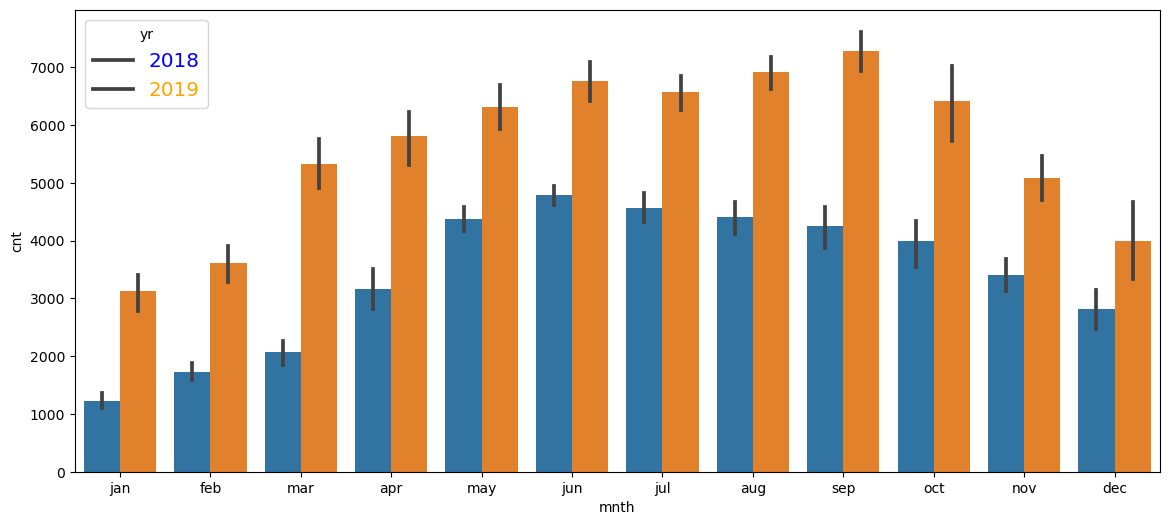

In [266]:
categorical_bar_yearwise('mnth')

- The users are more in the months of June, July, August and September, and increased from 2018 to 2019 for all months.

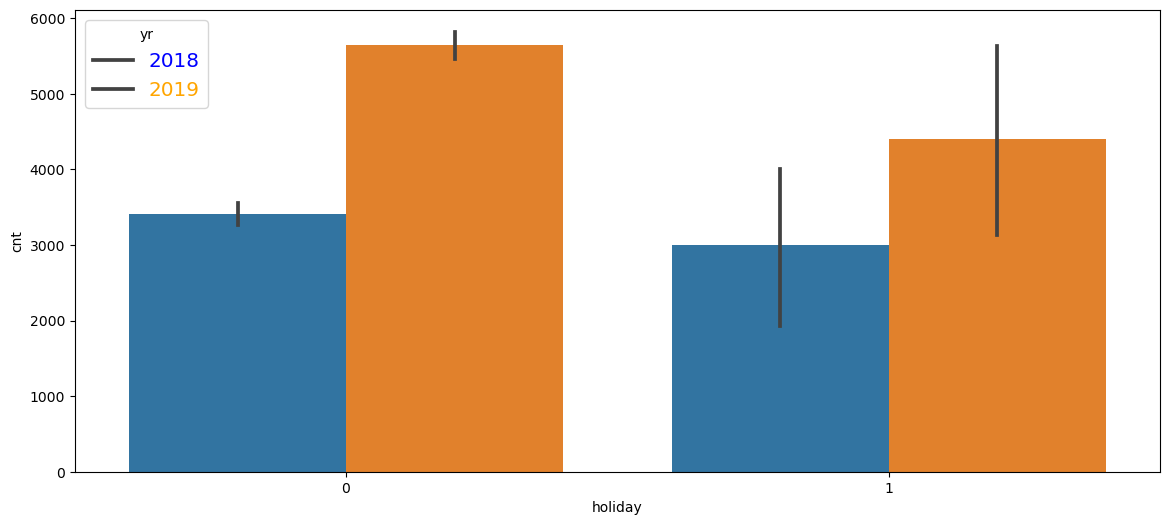

In [267]:
categorical_bar_yearwise('holiday')

- People prefer to rent bikes on working days and stay home during holidays.

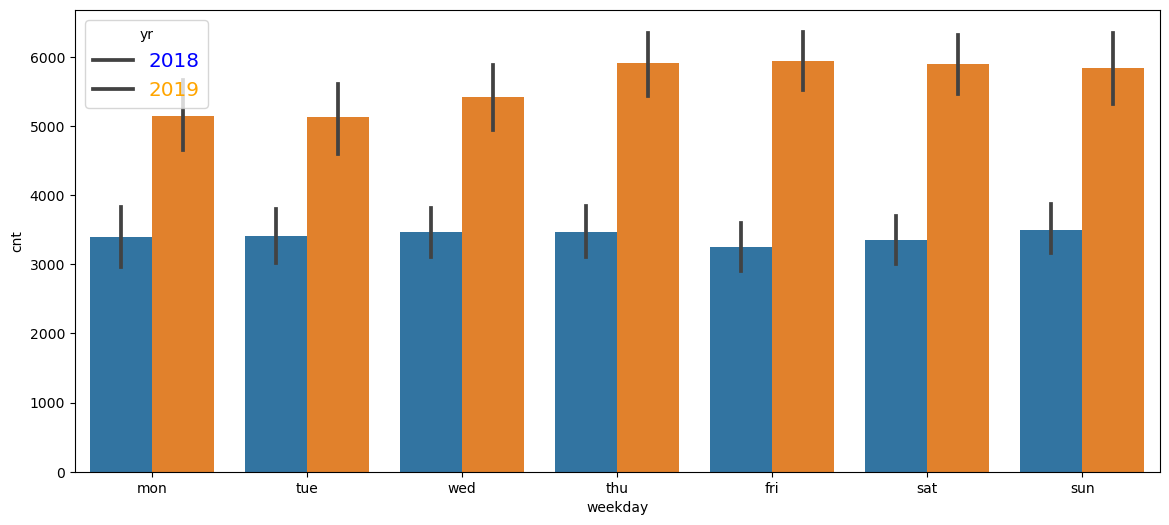

In [268]:
categorical_bar_yearwise('weekday')

- Thursday, Friday, Saturday and Sunday have more number of users as compared to other days.

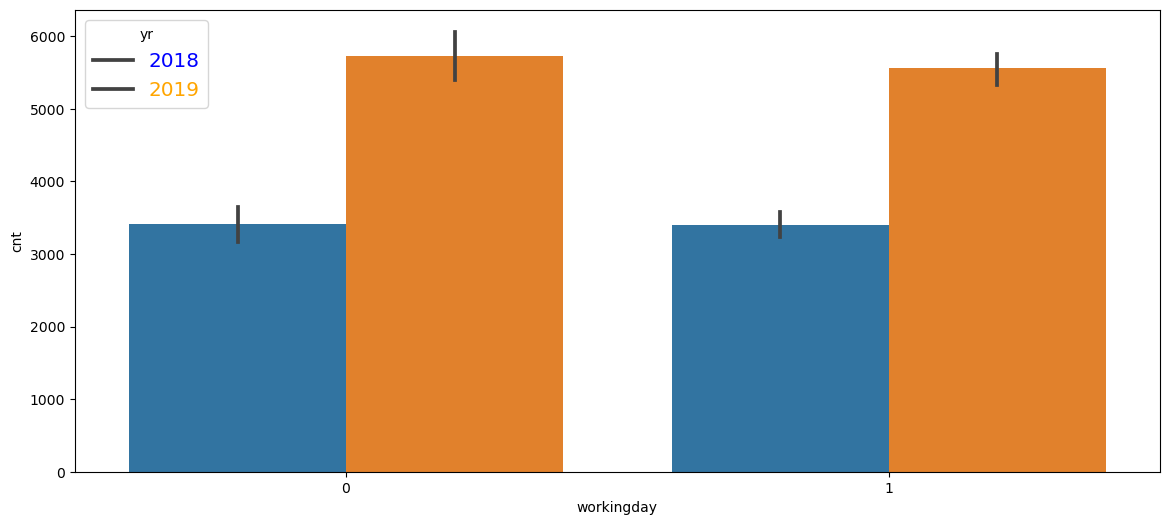

In [269]:
categorical_bar_yearwise('workingday')

- Booking is almost same either on a working day or on a non-working day. Users increased from 2018 to 2019.

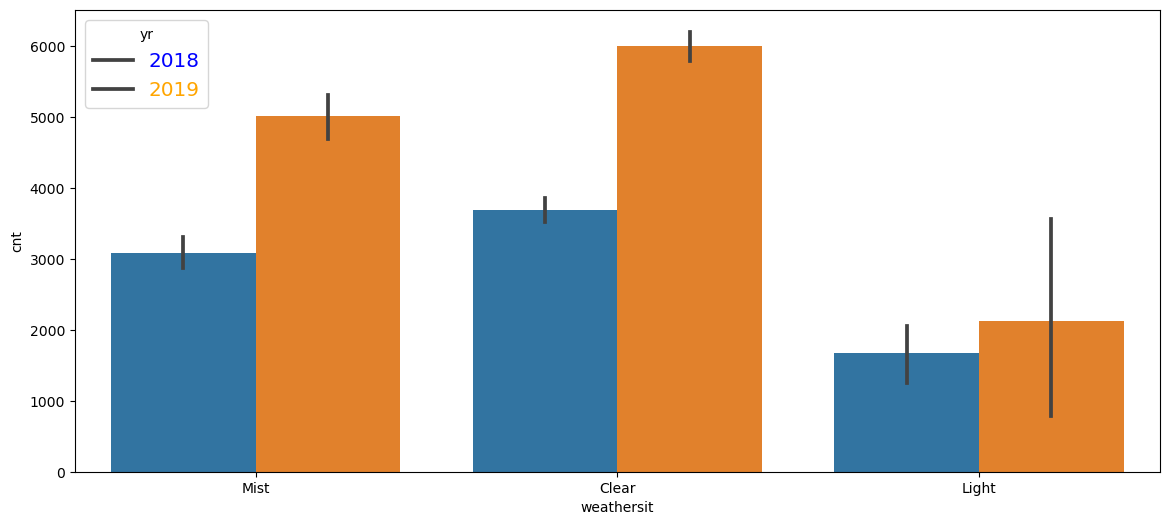

In [270]:
categorical_bar_yearwise('weathersit')

- People prefer to rent bikes when the sky is clear or mist/few clouds.

### Analyzing Numerical Variables

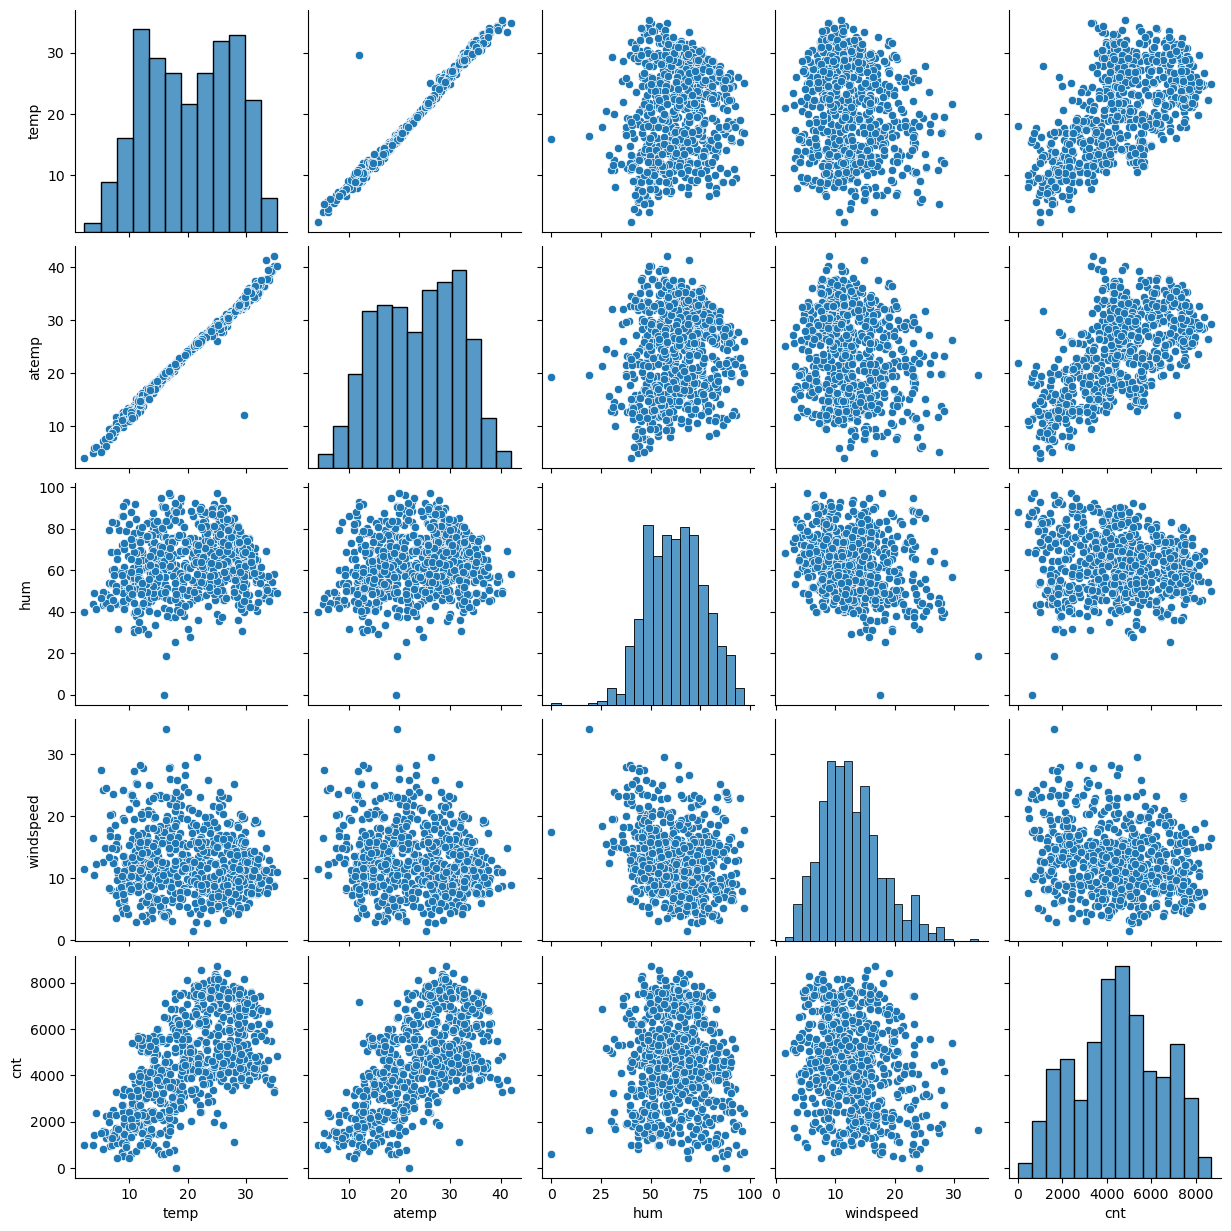

In [271]:
# creating Pair plot for numerical/continuous variables
sns.pairplot(bike_sharing_data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

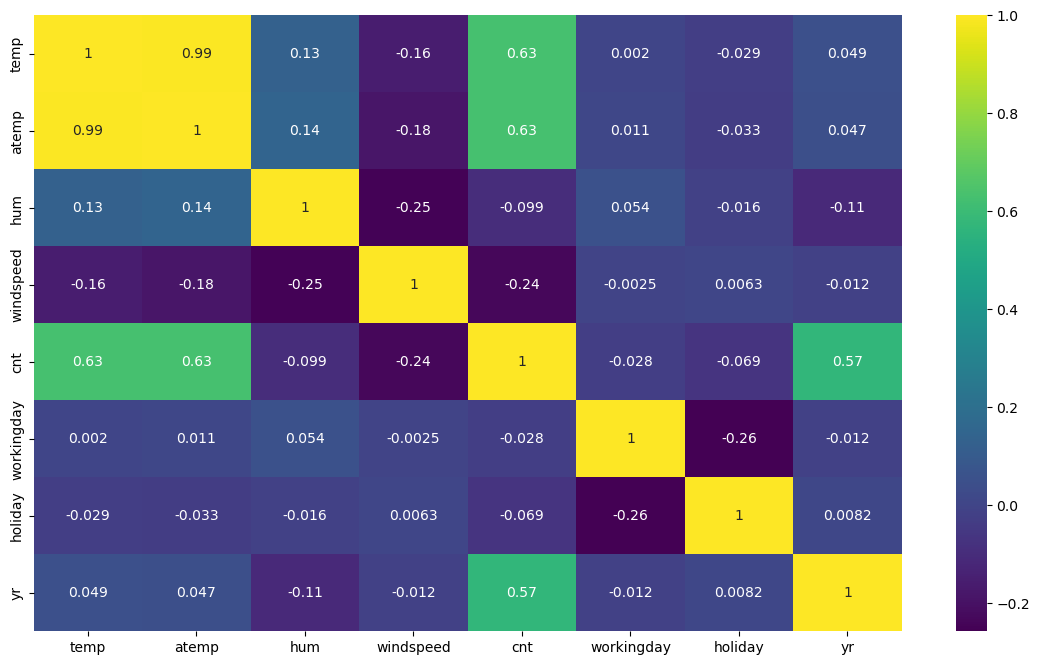

In [272]:
#creating Heat map for checking correlation
plt.figure(figsize = (14, 8))
sns.heatmap(bike_sharing_data[['temp','atemp','hum','windspeed','cnt','workingday','holiday','yr']].corr(), annot = True, cmap="viridis")
plt.show()

- The correlation between temp and atemp is very high(0.99). So we can ignore 1 variable during RFE method.
- The correation between cnt with yr(0.57), temp(0.63) and atemp(0.63) is also quite good.

## Step 3 : Preparing the Data

In [273]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [274]:
## Checking the data again
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Create Dummy variables for season, mnth, weekday,  weathersit

In [275]:
seasons_df = pd.get_dummies(bike_sharing_data.season,drop_first=True,dtype=int)
months_df = pd.get_dummies(bike_sharing_data.mnth,drop_first=True,dtype=int)
weekdays_df = pd.get_dummies(bike_sharing_data.weekday,drop_first=True,dtype=int)
weathersit_df = pd.get_dummies(bike_sharing_data.weathersit,drop_first=True,dtype=int)

In [276]:
seasons_df

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [277]:
months_df

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [278]:
weekdays_df

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [279]:
weathersit_df

,Light,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [280]:
# concatenating all the above dataframes to the original data
bike_sharing_data = pd.concat([bike_sharing_data,seasons_df,months_df,weekdays_df,weathersit_df],axis=1)

In [281]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light,Mist
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [282]:
# Dropping season, mnth, weekday and weathersit columns as dummy variables have already been created.
bike_sharing_data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [283]:
bike_sharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    int32  
 9   summer      730 non-null    int32  
 10  winter      730 non-null    int32  
 11  aug         730 non-null    int32  
 12  dec         730 non-null    int32  
 13  feb         730 non-null    int32  
 14  jan         730 non-null    int32  
 15  jul         730 non-null    int32  
 16  jun         730 non-null    int32  
 17  mar         730 non-null    int32  
 18  may         730 non-null    int32  
 19  nov         730 non-null    i

## Step 4 : Dataset Splitting into Training and Testing data

In [285]:
# splitting the dataset into train and test

# we need same random numbers again and again for testing and training data respectively
np.random.seed(0)
bike_sharing_data_train, bike_sharing_data_test = train_test_split(bike_sharing_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [286]:
# checking the training data
bike_sharing_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light,Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [287]:
bike_sharing_data_train.shape

(510, 30)

In [288]:
# checking the testing data
bike_sharing_data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light,Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [289]:
bike_sharing_data_test.shape

(219, 30)

#### Scaling the Numerical Variables

In [290]:
# Using the minmaxscaler function for scaling the numerical variables
scaler = MinMaxScaler()

In [291]:
# checking the columns again
bike_sharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'Light', 'Mist'],
      dtype='object')

In [292]:
numerical_vars_train = ['temp', 'atemp', 'hum', 'windspeed' ,'cnt']
bike_sharing_data_train[numerical_vars_train] = scaler.fit_transform(bike_sharing_data_train[numerical_vars_train])

In [293]:
bike_sharing_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [294]:
bike_sharing_data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [295]:
## Creating X and y training variables
y_train = bike_sharing_data_train.pop('cnt')
X_train = bike_sharing_data_train

In [296]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [297]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Analyzing the Correlation matrix among the variables

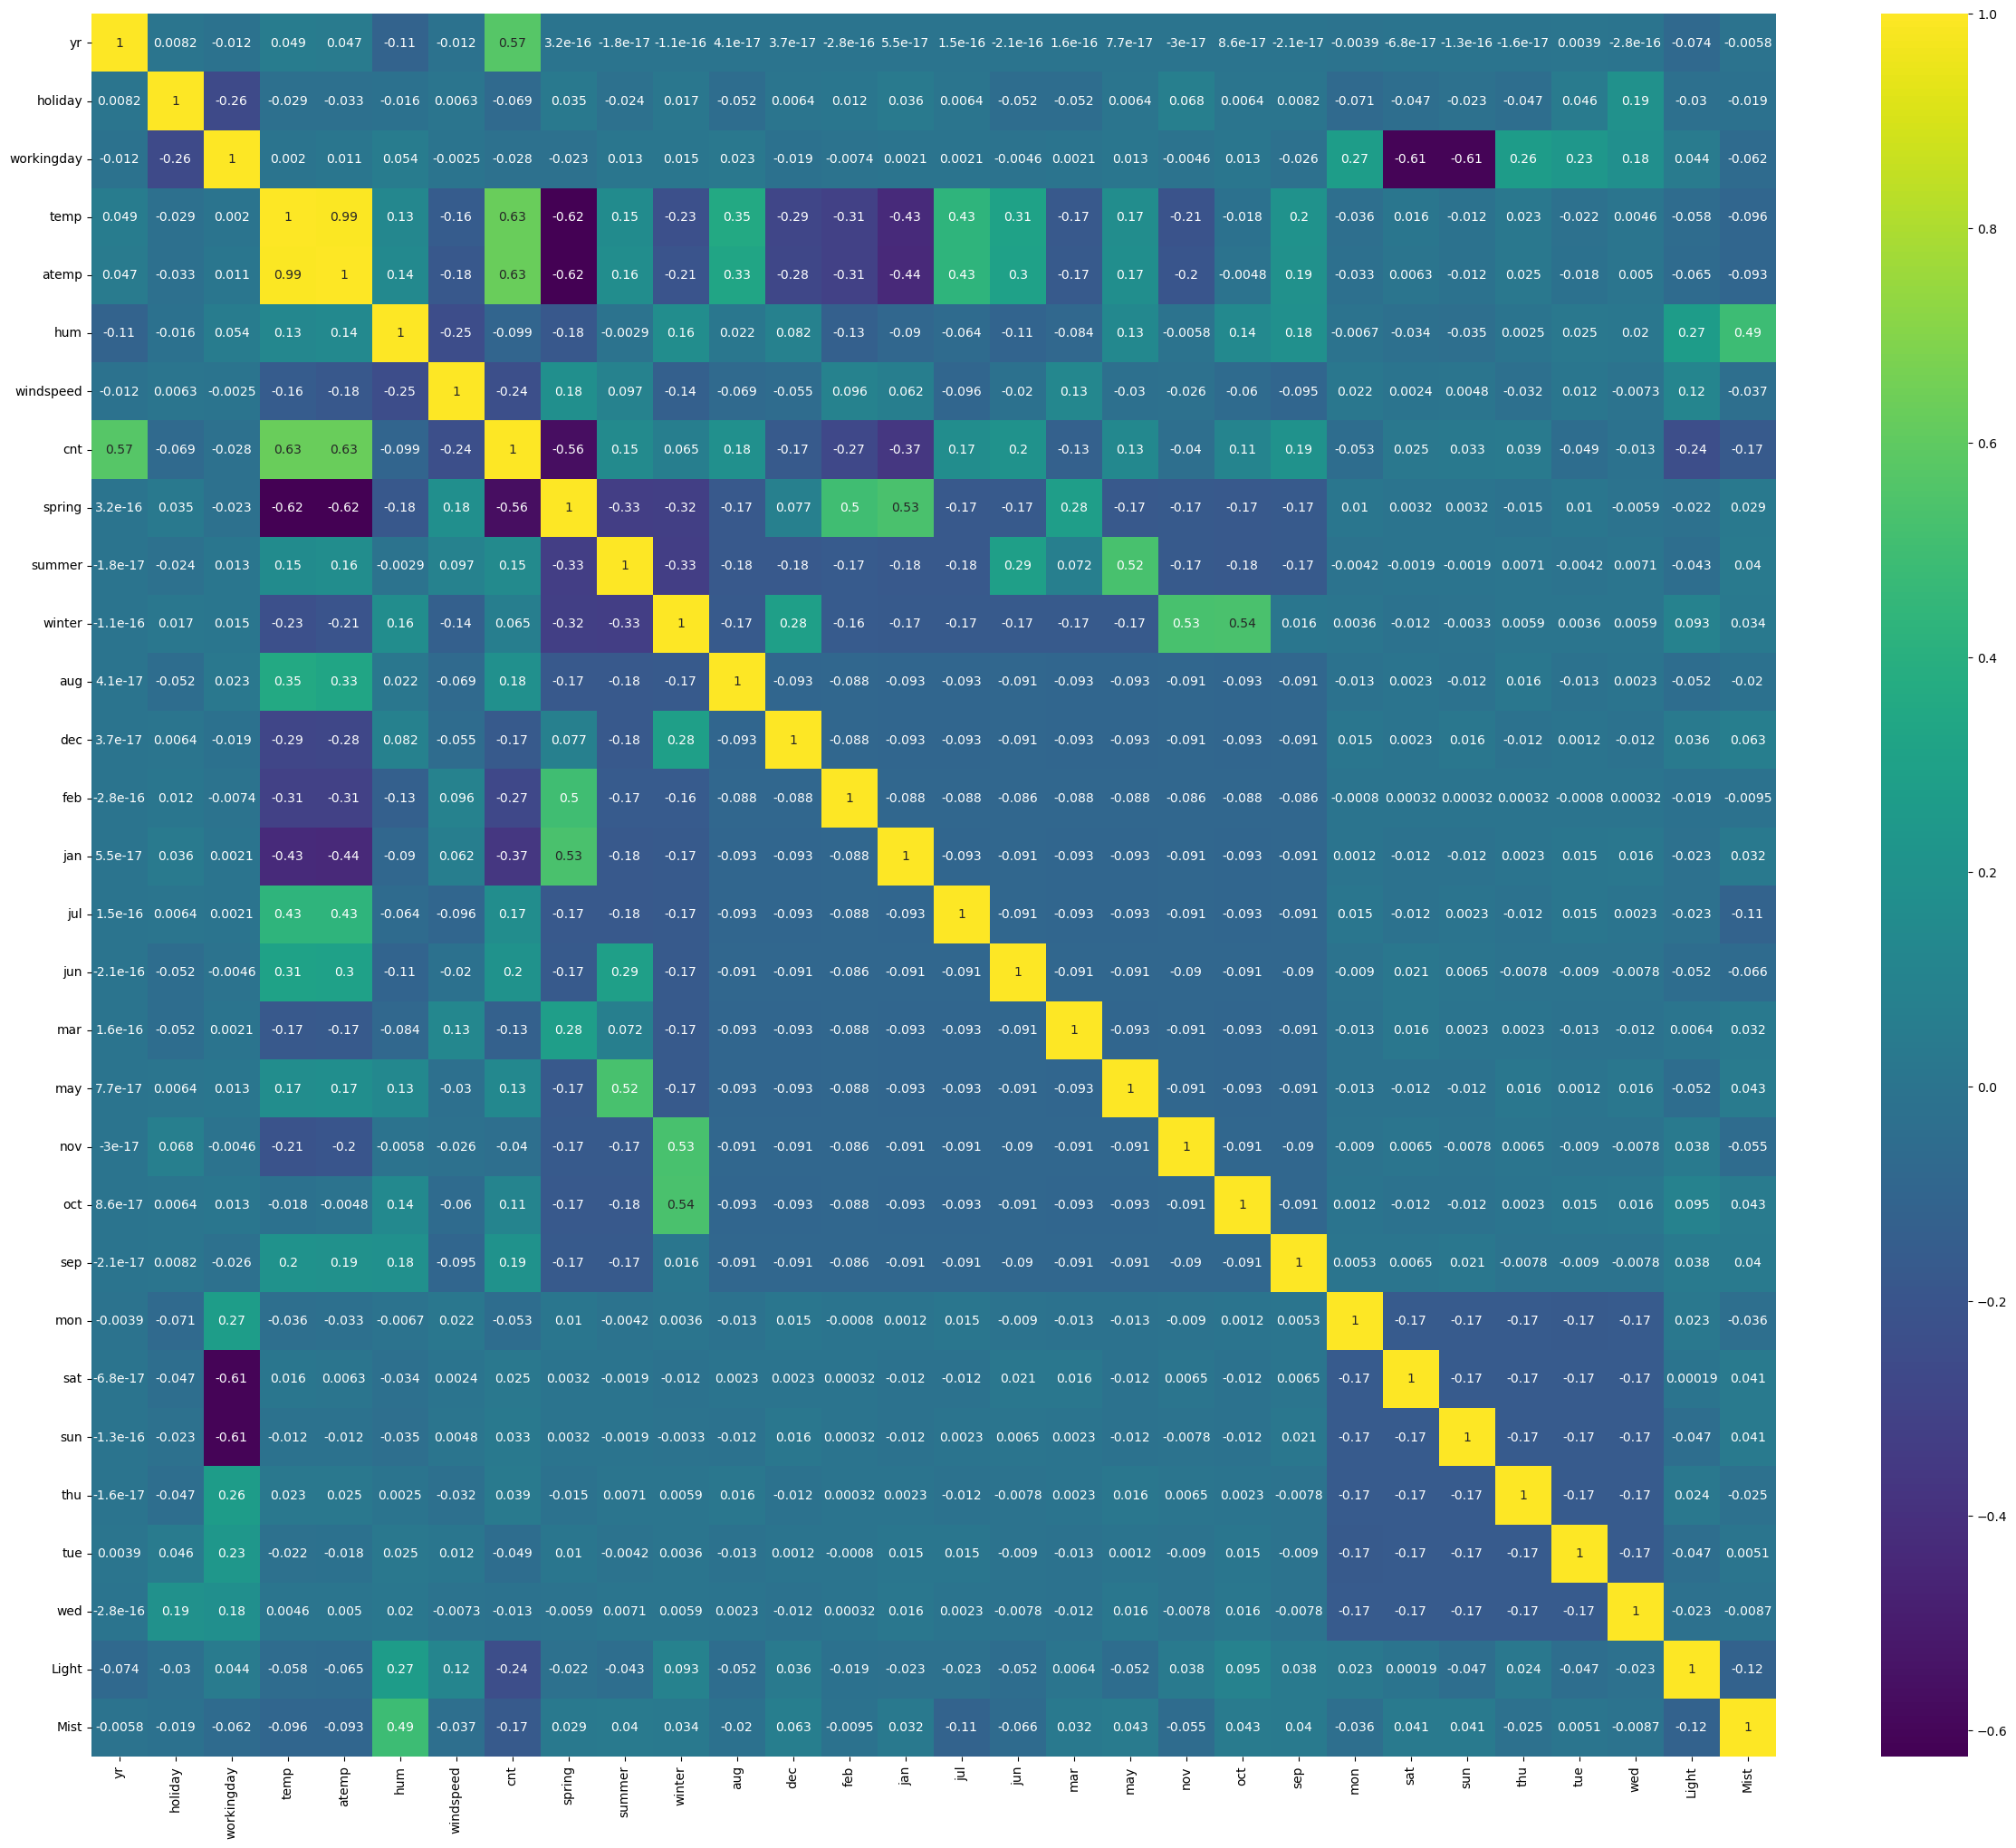

In [298]:
plt.figure(figsize=(30,25))
sns.heatmap(bike_sharing_data.corr() , annot = True, cmap='viridis')
plt.show()

From the above Correlation Coefficient Hatmap, we can see that no variable is highly correlated with another variable in any way. So, we can proceed further and check Multi-Collinearity while creating models itself.

## Selecting the Top15 variables through RFE method

In [299]:
# RFE method for Feature Elimination

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [300]:
# Zipping the column names with their rankings
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('Light', True, 1),
 ('Mist', True, 1)]

In [301]:
# Selecting the RFE columns
column = X_train.columns[rfe.support_]
column

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'Light', 'Mist'],
      dtype='object')

## Step 5 : Building the Linear Model

##### Building the First Model

In [302]:
X_train_RFE = X_train[column]

In [303]:
X_train_lm_1 = sm.add_constant(X_train_RFE)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          3.34e-189
Time:                        20:16:30   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

### Calculating VIF

In [304]:
## Creating the generic function to calculate VIF
def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values ,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [305]:
calculate_VIF(X_train_RFE)

,feature,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist,2.32
0,yr,2.09
11,nov,1.83
9,jan,1.75


In [306]:
# We can drop hum as it shows very high VIF value > 10
X_train_new = X_train_RFE.drop(['hum'], axis = 1)

##### Building the second model

In [307]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.57e-186
Time:                        20:16:30   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [308]:
# calculating the VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,nov,1.80
8,jan,1.66
9,jul,1.59
13,Mist,1.56


In [309]:
# We can drop summer as it shows high P value(0.032)
X_train_new = X_train_new.drop(['summer'], axis = 1)

##### Building the third Model

In [310]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.08e-186
Time:                        20:16:30   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.025     11.427      0.0

In [311]:
# calculate VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,nov,1.80
7,jan,1.65
12,Mist,1.53
6,dec,1.46
8,jul,1.36


The model looks fine as all the VIF values are less than 5. Let's make the model even better than this.

In [312]:
# We can drop nov as it shows high P value(0.01)
X_train_new = X_train_new.drop(['nov'], axis = 1)

##### Buiding the fourth model

In [313]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          2.02e-186
Time:                        20:16:30   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2769      0.025     11.074      0.0

In [314]:
# calculate VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,jan,1.64
11,Mist,1.53
8,jul,1.36
6,dec,1.29
9,sep,1.20


In [315]:
# We can drop dec as it shows high P value(0.037)
X_train_new = X_train_new.drop(['dec'], axis = 1)

##### Building the fifth model

In [316]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.13e-186
Time:                        20:16:30   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2657      0.025     10.843      0.0

In [317]:
# calculate VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
6,jan,1.60
10,Mist,1.53
5,winter,1.40
7,jul,1.36
8,sep,1.20
9,Light,1.08


In [318]:
# We can drop jan as it shows high P value(0.018)
X_train_new = X_train_new.drop(['jan'], axis = 1)

##### Building the sixth model

In [319]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.16e-186
Time:                        20:16:30   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.024     10.530      0.0

In [320]:
# calculate VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,Mist,1.51
5,winter,1.40
6,jul,1.35
7,sep,1.20
8,Light,1.08
1,holiday,1.04


- We can consider the above model i.e lr_6 as the final model, as it seems to have very low multicollinearity between the predictors, and the p-values for all the predictors is significant.
- F-statistic value of 248.7 (which is greater than 1) and the Prob(F-statistic) of 1.16e-186 i.e almost equals to zero, states that the overall model is significant.

In [321]:
#checking the coefficient parameter
lr_6.params

const        0.251899
yr           0.234092
holiday     -0.098556
temp         0.451455
windspeed   -0.139817
spring      -0.110795
winter       0.047278
jul         -0.072719
sep          0.057705
Light       -0.286408
Mist        -0.081133
dtype: float64

## Step 6 : Residual Analaysis

In [322]:
# Calculating the prediction value of y for the lr_6 model
y_train_pred = lr_6.predict(X_train_lm_6)

#### Distribution Of Error Terms

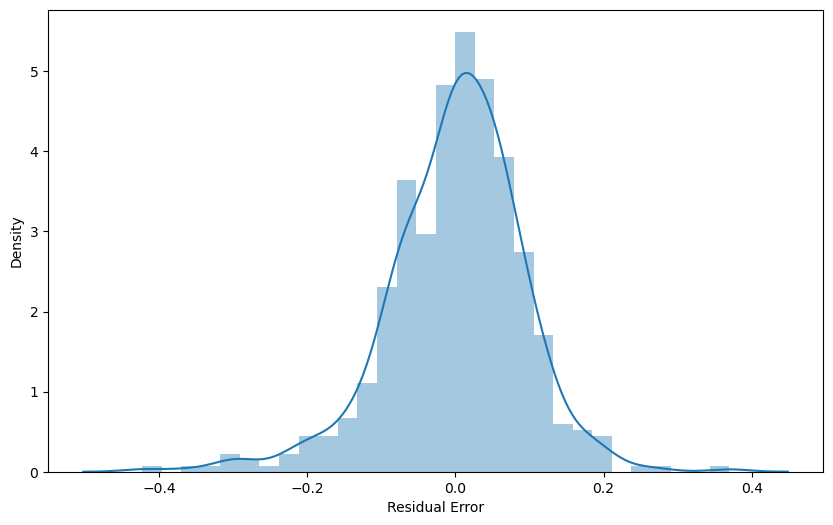

In [323]:
# plotting the histogram graph of the residual
plt.figure(figsize=(10,6))
sns.distplot(y_train - y_train_pred ,bins =30)
plt.xlabel("Residual Error")
plt.show()

- Errors are normally distributed with mean 0 and constant variance.

## Homoscedasticity of the model

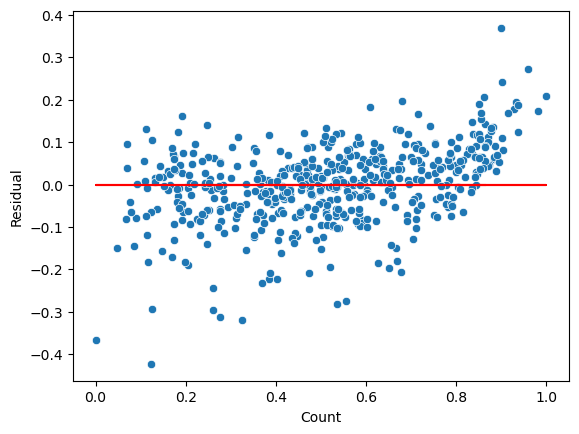

In [324]:
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can say that residuals are equal distributed across the predicted value.
- We can see equal variance and we do NOT observe high concentration of data points in certain regions & low concentration in certain regions.
- This proves Homoscedasticity of the model/Error Terms.

## Multicollinearity of the model

In [325]:
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,Mist,1.51
5,winter,1.40
6,jul,1.35
7,sep,1.20
8,Light,1.08
1,holiday,1.04


VIF values for all the features are less than 5. So the model is having no multi collinearity.

## Linearity of the model

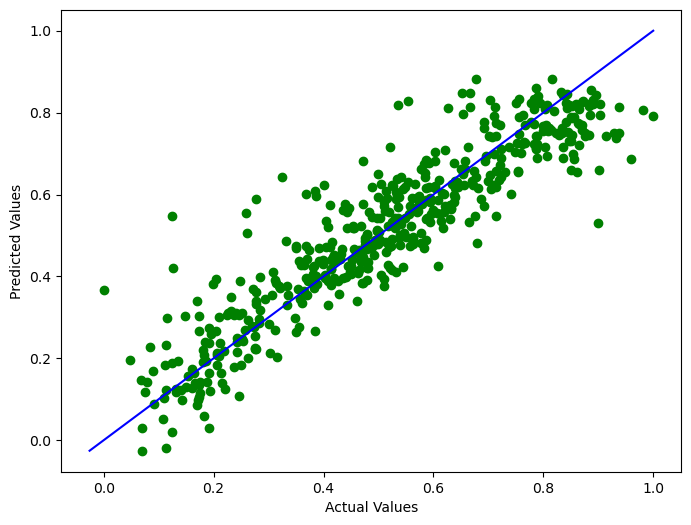

In [326]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred, c='green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
p1 = max(max(y_train_pred), max(y_train))
p2 = min(min(y_train_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.show()

- The actual values and the predicted values are showing linear correlation.

# Step 7 : Making the final prediction

In [327]:
# Applying scaling on the test dataset as we did earlier
numerical_vars_test = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_sharing_data_test[numerical_vars_test] = scaler.transform(bike_sharing_data_test[numerical_vars_test])

In [328]:
bike_sharing_data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [329]:
bike_sharing_data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [330]:
# Creating X and y testing variables
y_test = bike_sharing_data_test.pop('cnt')
X_test = bike_sharing_data_test

In [331]:
columns_test = X_train_new.columns
X_test = X_test[columns_test]

In [332]:
X_test.head()

,yr,holiday,temp,windspeed,spring,winter,jul,sep,Light,Mist
184,0,1,0.831783,0.084219,0,0,1,0,0,1
535,1,0,0.901354,0.153728,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0


In [333]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [334]:
# Predicing the values using the model
X_test_lm_6 = sm.add_constant(X_test)
y_test_pred = lr_6.predict(X_test_lm_6)  

In [335]:
# checking the R-Squared value for test predictions
r2 = r2_score(y_test, y_test_pred) 

In [336]:
r2

0.8070101019557963

## Step 8 : Model Evaluation

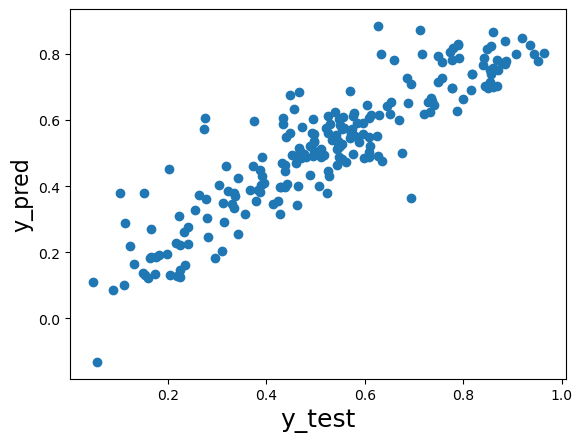

In [337]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [338]:
lr_6.params

const        0.251899
yr           0.234092
holiday     -0.098556
temp         0.451455
windspeed   -0.139817
spring      -0.110795
winter       0.047278
jul         -0.072719
sep          0.057705
Light       -0.286408
Mist        -0.081133
dtype: float64

### Final Equation:

#### cnt = 0.251899 + 0.234092 x yr + (-0.098556) x holiday + 0.451455 x temp + (-0.139817) x windspeed + (-0.110795) x spring + 0.047278 x winter + (-0.072719) x jul + 0.057705 x sep + (-0.286408) x Light + (-0.081133) x Mist

In [339]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7977


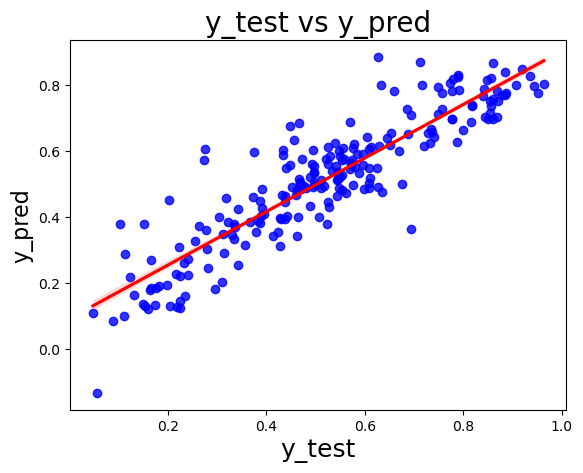

In [340]:
# Visualizing the fit on the test data
# Plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

This model is giving accurate prediction as the graph between test data and predicted data is linear.

# Final Summary

#### Comparison

- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8070
- Train dataset Adjusted R^2 : 0.830   
- Test dataset Adjusted R^2  : 0.7977

### Analyzing the above model, the company should focus on the following features:                       
- Company should focus on expanding business during Spring season and September month.
- Based on the previous data, it is expected that thwre will be a boom in the number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow and Heavy Rain, so they could probably use this time to service the bikes without having any business impact.

### Hence when the situation comes back to normal, the company should come up with new offers during spring season when the weather is pleasant and also advertise for the month of September as this is when the business would be at its best.

## Demand of bike depends on the below factors :

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)